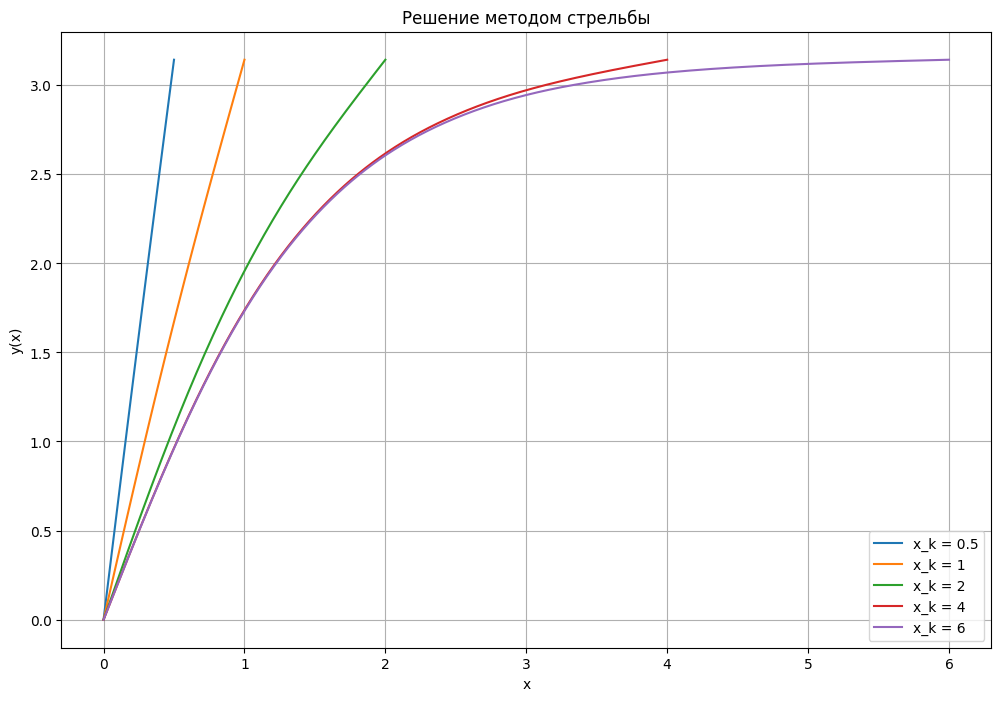

In [1]:
import numpy as np
from scipy.integrate import solve_ivp
from scipy.optimize import root_scalar
import matplotlib.pyplot as plt

def shooting_method(x_k, h=0.01, tol=1e-6):
    """Решаем задачу методом стрельбы"""
    
    # Определяем систему ОДУ для метода стрельбы
    def ode_system(x, y, dy_dx_guess):
        return [y[1], -np.sin(y[0])]
    
    # Функция для определения невязки на правой границе
    def boundary_condition(dy_dx_guess):
        sol = solve_ivp(ode_system, [0, x_k], [0, dy_dx_guess], 
                       t_eval=np.arange(0, x_k + h, h), args=(dy_dx_guess,))
        return sol.y[0, -1] - np.pi
    
    # Находим начальное значение производной, удовлетворяющее граничному условию
    result = root_scalar(boundary_condition, x0=2.0, x1=3.0, rtol=tol)
    dy_dx_initial = result.root
    
    # Решаем с найденным начальным условием
    sol = solve_ivp(ode_system, [0, x_k], [0, dy_dx_initial], 
                   t_eval=np.arange(0, x_k + h, h), args=(dy_dx_initial,))
    
    return sol.t, sol.y[0]

# Решаем для разных x_k
x_k_values = [0.5, 1, 2, 4, 6]
plt.figure(figsize=(12, 8))

for x_k in x_k_values:
    x, y = shooting_method(x_k)
    plt.plot(x, y, label=f'x_k = {x_k}')

plt.title('Решение методом стрельбы')
plt.xlabel('x')
plt.ylabel('y(x)')
plt.legend()
plt.grid()
plt.show()

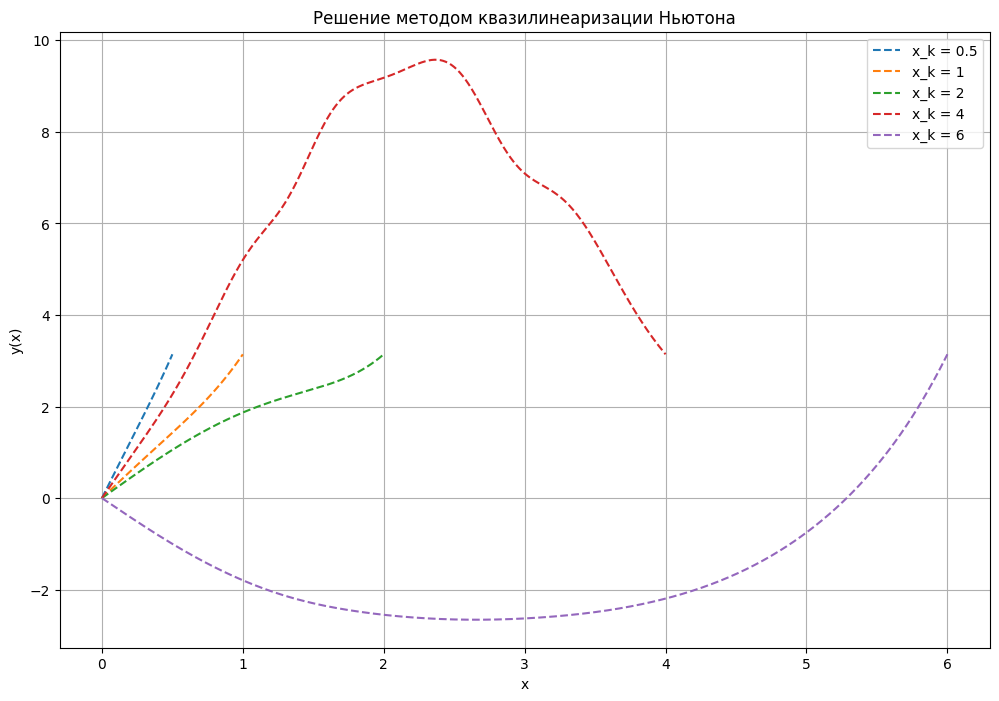

In [2]:
def newton_quasilinearization(x_k, h=0.01, max_iter=100, tol=1e-6):
    """Решаем задачу методом квазилинеаризации Ньютона"""
    
    n = int(x_k / h) + 1
    x = np.linspace(0, x_k, n)
    y = np.linspace(0, np.pi, n)  # Начальное приближение
    
    for _ in range(max_iter):
        y_old = y.copy()
        
        # Строим матрицу для линейной системы
        A = np.zeros((n, n))
        b = np.zeros(n)
        
        # Граничные условия
        A[0, 0] = 1
        b[0] = 0
        A[-1, -1] = 1
        b[-1] = np.pi
        
        # Внутренние точки (конечные разности)
        for i in range(1, n-1):
            A[i, i-1] = 1/h**2
            A[i, i] = -2/h**2 + np.cos(y_old[i])
            A[i, i+1] = 1/h**2
            b[i] = np.sin(y_old[i]) - y_old[i] * np.cos(y_old[i])
        
        # Решаем линейную систему
        y = np.linalg.solve(A, b)
        
        # Проверяем сходимость
        if np.max(np.abs(y - y_old)) < tol:
            break
    
    return x, y

# Решаем для разных x_k
plt.figure(figsize=(12, 8))

for x_k in x_k_values:
    x, y = newton_quasilinearization(x_k)
    plt.plot(x, y, '--', label=f'x_k = {x_k}')

plt.title('Решение методом квазилинеаризации Ньютона')
plt.xlabel('x')
plt.ylabel('y(x)')
plt.legend()
plt.grid()
plt.show()